In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime, timedelta

## For SDK
from getpass import getpass
from odp_sdk import ODPClient

from UtilityFunctions import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_palette(sns.color_palette("bright"))
import warnings
warnings.filterwarnings("ignore")

# Connect to API

In [2]:
client = ODPClient(api_key=getpass(prompt='Insert your personal ODP API key:'), 
                       project="odp", client_name="odp")

Insert your personal ODP API key:········


INFO:odp-sdk.log:Connected
INFO:odp-sdk.log:Logged in to 'odp' as user 'Tara.Baris@oceandata.earth'


# Pull data for desired lat/lon and timespan
Don't forget to specify if you want flagged data included or excluded

In [3]:
df=client.casts(longitude=[0,15],
                latitude=[50,65], 
                timespan=['2018-06-01','2018-08-31'],
                include_flagged_data = True,
                n_threads=35) 

INFO:odp-sdk.log:Locating available casts..
INFO:odp-sdk.log:-> 3530 casts found
INFO:odp-sdk.log:Downloading data from casts..
INFO:odp-sdk.log:-> 215581 data rows downloaded in 35.87s


In [4]:
df.head()

,date,lat,lon,z,z_WODflag,z_origflag,Oxygen,Oxygen_WODflag,Oxygen_origflag,Temperature,Temperature_WODflag,Temperature_origflag,Salinity,Salinity_WODflag,Salinity_origflag,Chlorophyll,Chlorophyll_WODflag,Chlorophyll_origflag,Pressure,Pressure_WODflag,Pressure_origflag,Nitrate,Nitrate_WODflag,Nitrate_origflag,pH,pH_WODflag,pH_origflag,Latitude,Latitude_WODflag,Latitude_origflag,Longitude,Longitude_WODflag,Longitude_origflag,JulianDay,JulianDay_WODflag,JulianDay_origflag,externalId,datetime
0,20180811,51.81333,2.159667,2.973773,0,NaN,232.229950,0.0,NaN,18.639999,0.0,NaN,34.966,0.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32902_19081562,2018-08-11
1,20180811,51.81333,2.159667,3.469397,0,NaN,232.665665,0.0,NaN,18.639999,0.0,NaN,34.966,0.0,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32902_19081562,2018-08-11
2,20180811,51.81333,2.159667,3.965021,0,NaN,232.665665,0.0,NaN,18.639999,0.0,NaN,34.966,0.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32902_19081562,2018-08-11
3,20180811,51.81333,2.159667,4.460643,0,NaN,233.101349,0.0,NaN,18.639999,0.0,NaN,34.966,0.0,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32902_19081562,2018-08-11
4,20180811,51.81333,2.159667,4.956264,0,NaN,232.665665,0.0,NaN,18.639999,0.0,NaN,34.966,0.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32902_19081562,2018-08-11


# Use built-in functions to get a sense of the data present

In [5]:
missing_values(df, var_list = ['Oxygen', 'Temperature', 'Salinity', 'Chlorophyll','pH', 'Nitrate'])

,Variables,Null Values,Percentage Missing
0,Temperature,26,0.01
1,Salinity,3140,1.46
2,Oxygen,148261,68.77
3,Nitrate,215460,99.94
4,pH,215487,99.96
5,Chlorophyll,215510,99.97


<AxesSubplot:title={'center':'Percentage of Values Missing (Total Rows: 215581)'}, xlabel='Percent Missing', ylabel='Variables'>

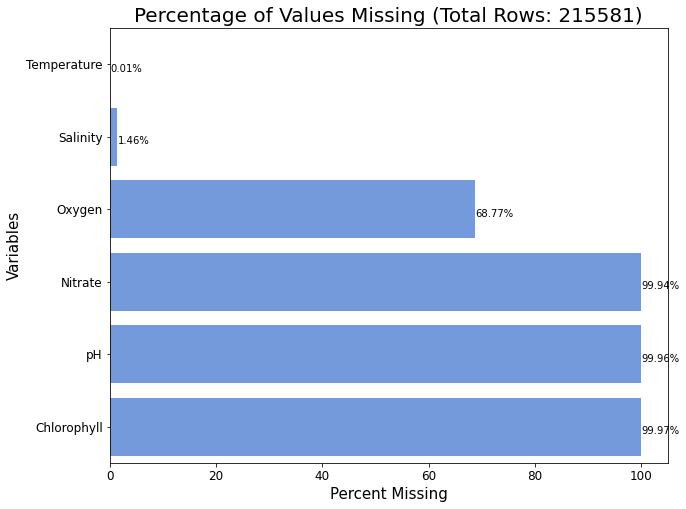

In [6]:
plot_missing(df, var_list = ['Oxygen', 'Temperature', 'Salinity', 'Chlorophyll', 'pH', 'Nitrate'])

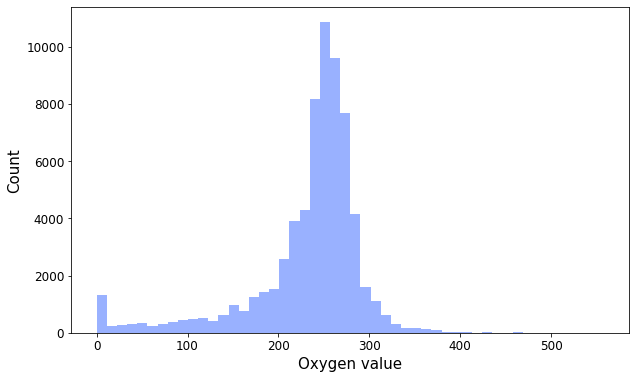

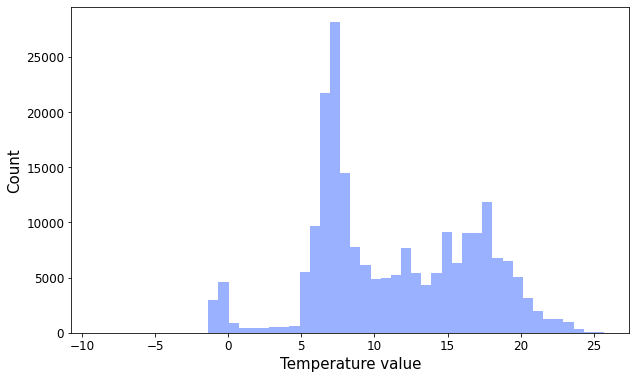

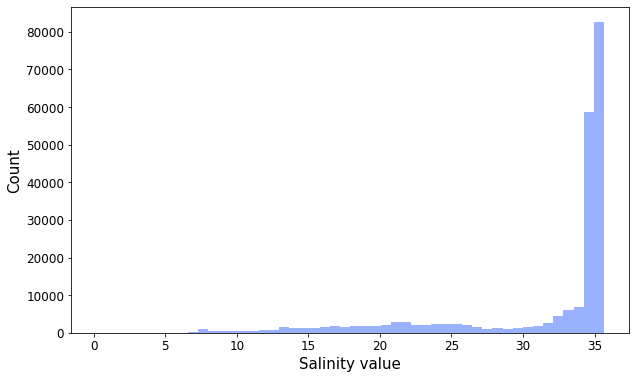

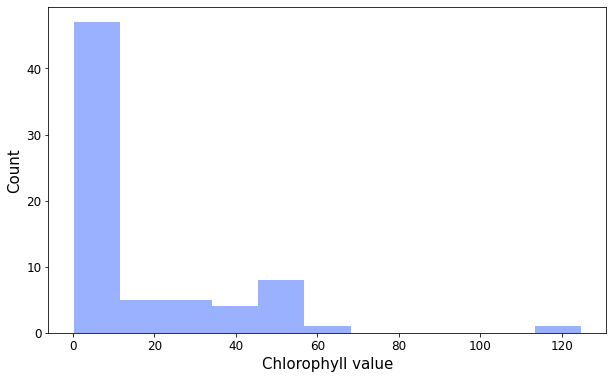

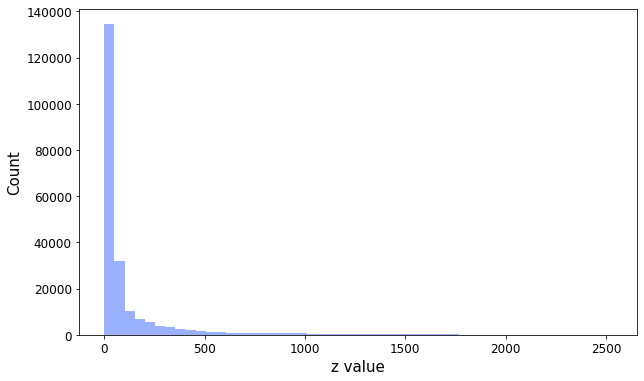

In [7]:
plot_distributions(df, var_list = ['Oxygen', 'Temperature', 'Salinity', 'Chlorophyll', 'z'])

# Get units for each variable

In [8]:
get_units()

{'z': 'm',
 'Oxygen': 'umol/kg',
 'Temperature': 'degree_C',
 'Chlorophyll': 'ugram/l',
 'Pressure': 'dbar',
 'Nitrate': 'umol/kg',
 'Latitude': 'degrees_north',
 'Longitude': 'degrees_east'}

# Plot casts for specific variable
Here we do Temperature and Oxygen. You can specify the colormap you want to use

In [9]:
## available colormaps through cmocean
cmocean.cm.cmapnames

['thermal',
 'haline',
 'solar',
 'ice',
 'gray',
 'oxy',
 'deep',
 'dense',
 'algae',
 'matter',
 'turbid',
 'speed',
 'amp',
 'tempo',
 'rain',
 'phase',
 'topo',
 'balance',
 'delta',
 'curl',
 'diff',
 'tarn']

Text(0.5, 1.0, 'Ocean Temperatures')

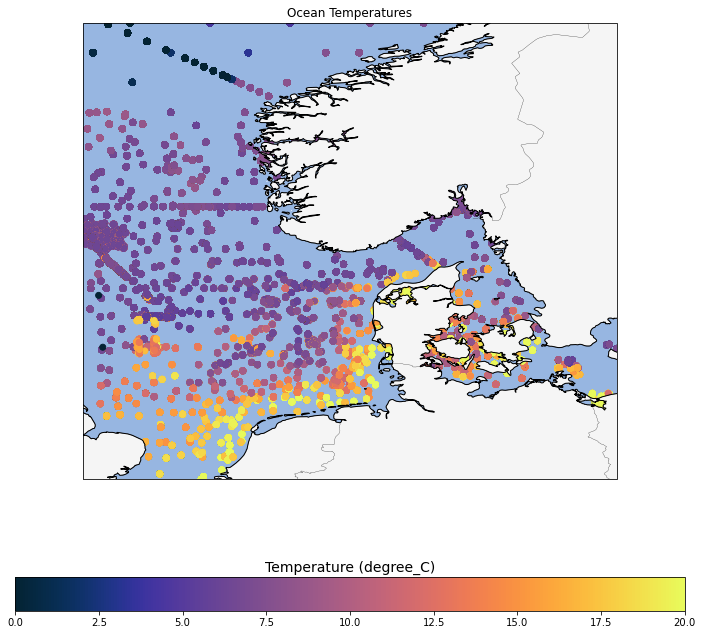

In [10]:
plot_casts('Temperature',df,cmap=cmocean.cm.thermal,vrange=[0,20]);plt.title('Ocean Temperatures');


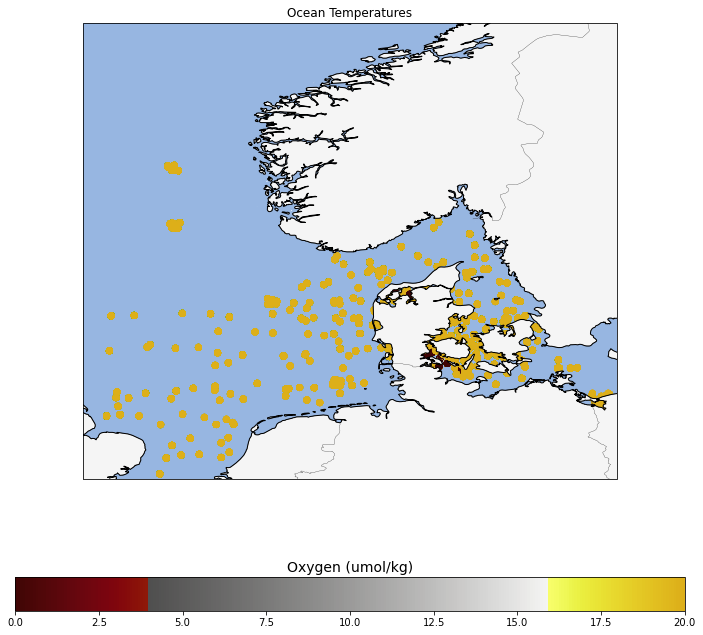

In [12]:
plot_casts('Oxygen',df,cmap=cmocean.cm.oxy,vrange=[0,20]);plt.title('Ocean Temperatures');


# Let's take a look at some metadata
Get casts from 2018 in Norway region

In [13]:
casts=client.get_available_casts(longitude=[-10,35],
                                latitude=[50,80],
                                timespan=['2018-06-01','2018-08-31'],
                                meta_parameters=['extId','date','time','lon','lat','country',
                                                 'Platform','dataset_code', 'equipment'])

casts.head()

,index,extId,date,time,lon,lat,country,Platform,dataset_code,equipment,datetime
186,0,cast_wod_3_2018_31462_18924171,20180704,90764.1291666627,-5.25,52.00,UNITED STATES,AUTONOMOUS PINNIPED,apb,animal mounted,2018-07-04
187,1,cast_wod_3_2018_31462_18924477,20180706,90766.35416665673,-5.41,51.90,UNITED STATES,AUTONOMOUS PINNIPED,apb,animal mounted,2018-07-06
190,4,cast_wod_3_2018_31462_18933242,20180825,90816.63124996424,-5.30,51.94,UNITED STATES,AUTONOMOUS PINNIPED,apb,animal mounted,2018-08-25
191,5,cast_wod_3_2018_31462_18923067,20180626,90756.75208330154,-5.37,52.00,UNITED STATES,AUTONOMOUS PINNIPED,apb,animal mounted,2018-06-26
192,6,cast_wod_3_2018_31462_18925898,20180715,90775.875,-5.38,51.98,UNITED STATES,AUTONOMOUS PINNIPED,apb,animal mounted,2018-07-15


In [14]:
casts.head()

,index,extId,date,time,lon,lat,country,Platform,dataset_code,equipment,datetime
186,0,cast_wod_3_2018_31462_18924171,20180704,90764.1291666627,-5.25,52.00,UNITED STATES,AUTONOMOUS PINNIPED,apb,animal mounted,2018-07-04
187,1,cast_wod_3_2018_31462_18924477,20180706,90766.35416665673,-5.41,51.90,UNITED STATES,AUTONOMOUS PINNIPED,apb,animal mounted,2018-07-06
190,4,cast_wod_3_2018_31462_18933242,20180825,90816.63124996424,-5.30,51.94,UNITED STATES,AUTONOMOUS PINNIPED,apb,animal mounted,2018-08-25
191,5,cast_wod_3_2018_31462_18923067,20180626,90756.75208330154,-5.37,52.00,UNITED STATES,AUTONOMOUS PINNIPED,apb,animal mounted,2018-06-26
192,6,cast_wod_3_2018_31462_18925898,20180715,90775.875,-5.38,51.98,UNITED STATES,AUTONOMOUS PINNIPED,apb,animal mounted,2018-07-15


In [33]:
cc = client.get_casts_from_raw_table(2018, 2018)

In [34]:
cc.head()

,dataset_code,extId,geo_index,date,lon,time,lat
cast_wod_3_2018_82_18864723,mrb,cast_wod_3_2018_82_18864723,82,20180922,-180.0,90844.0,-8.0
cast_wod_3_2018_88_18864693,mrb,cast_wod_3_2018_88_18864693,88,20180922,-180.0,90844.0,-2.0
cast_wod_3_2018_92_18864600,mrb,cast_wod_3_2018_92_18864600,92,20180921,-180.0,90843.0,2.0
cast_wod_3_2018_95_18864361,mrb,cast_wod_3_2018_95_18864361,95,20180918,-180.0,90840.0,5.0
cast_wod_3_2018_95_18865207,mrb,cast_wod_3_2018_95_18865207,95,20180928,-180.0,90850.0,5.0


# Plot modes of data collection for each cast

In [18]:

def plot_datasets(df, variable, latitude=None, longitude=None):
    '''
    Plots on a map casts belonging to specific dataset (mode of data collection, i.e. ctd, xbt)
    Input:  pandas dataframe incuding extId and variable of choice
            bounding box for lat and lon, default is none
    Output: map with color coded casts based on dataset_code
    '''

    if latitude and longitude:
        df = df[(df.lat.between(latitude[0], latitude[1])) & (df.lon.between(longitude[0], longitude[1]))]
    else:
        df = df
    variable = variable
    variable_list = list(df[[variable, 'extId']].groupby(variable).count().reset_index(0).sort_values(by='extId', ascending=False)[variable])
    colors = sns.color_palette('bright') + sns.color_palette('deep') + sns.color_palette('Set3')

    fig = plt.figure(figsize=(12, 12))
    color_plot =colors [0:len(df[variable].unique())]
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    legend_elements = []
    for i, j in enumerate(variable_list):
        sns.scatterplot(x="lon", y="lat", data=df[df[variable]==j], color = color_plot[i], s=30, marker='o', edgecolor='white', linewidths=0.05)
        legend_elements.append(Line2D([0], [0], color = colors[i], lw=4, label=variable_list[i]))
    if latitude and longitude:
        ax.set_extent([longitude[0], longitude[1], latitude[0], latitude[1]],crs=ccrs.PlateCarree())
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.7, linestyle=':')
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.legend(handles=legend_elements, loc='lower center',
               ncol=4, borderaxespad=-7., prop={'size': 12});
    geo_map(ax), plot_meta_stats(df, variable)


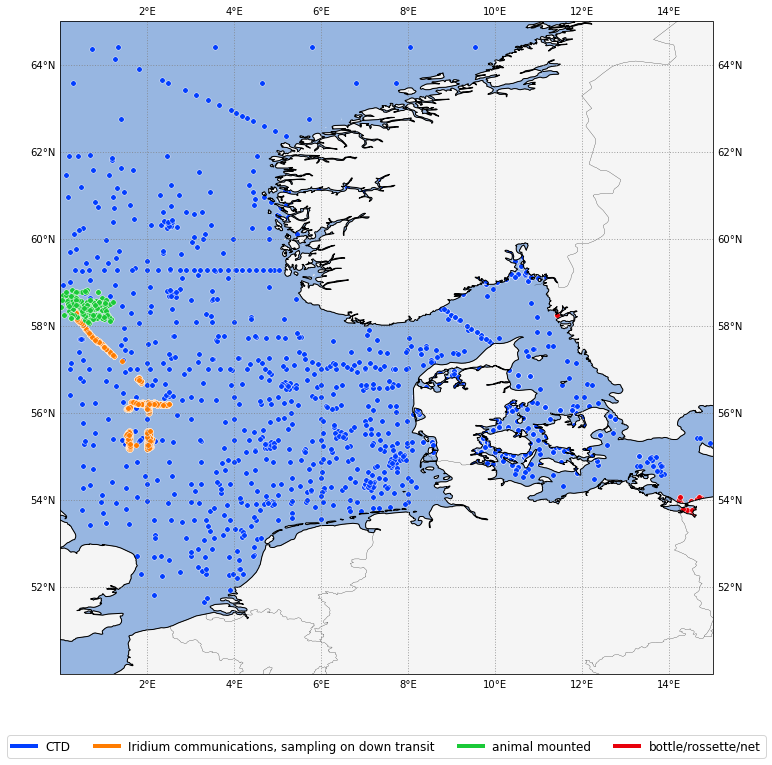

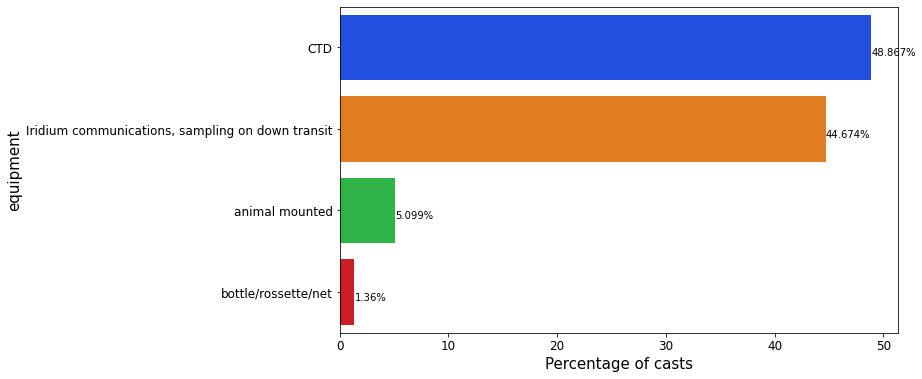

In [19]:
plot_datasets(casts, variable='equipment', longitude=[0,15],latitude=[50,65])

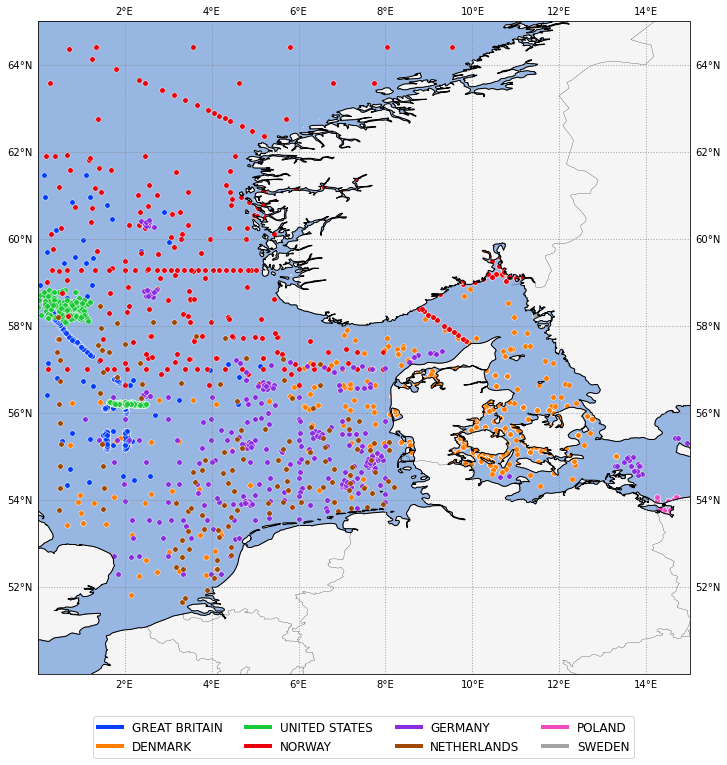

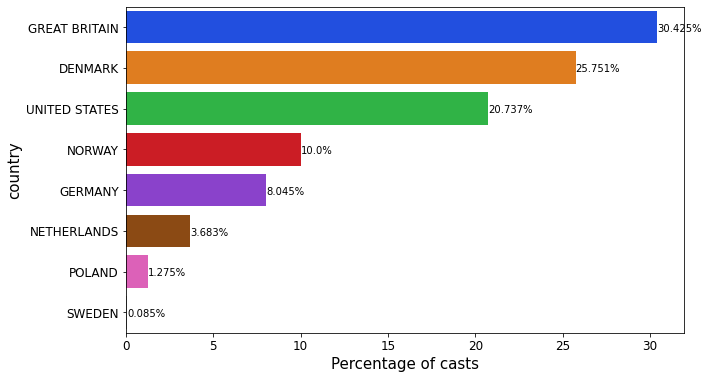

In [21]:
plot_datasets(casts, variable='country', longitude=[0,15],latitude=[50,65])